<a href="https://colab.research.google.com/github/ryukios/stat_ML/blob/main/random_forest_ebay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregamento do **dataset**

In [49]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import ensemble

In [50]:
dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')

In [51]:
dataset.head()


,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [52]:
dataset.tail()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
5803,49,0,N,6.069133,0.5,0,1.931712,0.5,1,5.616294,...,0.669362,0.602225,0.711554,0.644777,0.666970,0.742045,0.605412,0.650072,0.828953,Bom
5804,60,0,N,5.056324,0.5,0,3.152737,0.5,1,5.072437,...,0.698962,0.597975,0.690498,0.614929,0.614349,0.747452,0.640656,0.654348,0.801171,Ruim
5805,78,0,N,5.095499,0.4,0,3.535562,0.5,1,4.692843,...,0.710999,0.692540,0.728816,0.622679,0.708117,0.795567,0.697466,0.673904,0.832073,Bom
5806,95,0,N,4.780761,0.4,0,3.198620,0.5,1,4.563306,...,0.724970,0.718304,0.722504,0.573924,0.668312,0.805183,0.770677,0.710048,0.819924,Ruim
5807,53,0,N,4.525406,0.3,0,3.236950,0.5,1,4.488098,...,0.721490,0.601475,0.696407,0.642956,0.656245,0.712400,0.623931,0.633121,0.792092,Ruim


In [53]:
dataset.shape

(5806, 75)

In [54]:
dataset.dropna(inplace=True)
dataset.shape

(5806, 75)

In [55]:
dataset['blacklist'] = dataset['blacklist'] =='S'

In [56]:
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,False,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,False,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,False,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


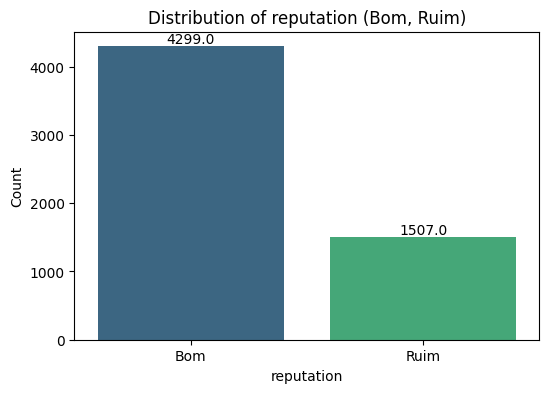

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='reputation', hue='reputation', data=dataset, palette='viridis', legend=False)
plt.title('Distribution of reputation (Bom, Ruim)')
plt.xlabel('reputation')
plt.ylabel('Count')

# Add labels with counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [58]:
X = dataset.iloc[:, 0:74].values

In [59]:
X.shape

(5806, 74)

In [60]:
X

array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
        0.828716381071851],
       [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
        0.82603890125472],
       ...,
       [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [61]:
y = dataset.iloc[:, 74].values

In [62]:
y.shape

(5806,)

In [63]:
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'], dtype=object)

In [64]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

Base de treinamento e Base de teste


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y, test_size = 0.2, stratify = y)

In [67]:
X_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [68]:
X_teste.shape, y_teste.shape

((1162, 74), (1162,))

In [69]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [70]:
4299 / len(dataset), 1507 / len(dataset)

(0.7404409231829142, 0.2595590768170858)

In [71]:
np.unique(y_teste, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([860, 302]))

In [72]:
860 / len(y_teste), 302 / len(y_teste)

(0.7401032702237521, 0.25989672977624784)

In [73]:
np.unique(y_treinamento, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3439, 1205]))

In [74]:
3439 / len(y_treinamento), 1205 / len(y_treinamento)

(0.7405254091300603, 0.2594745908699397)

Classificação com **Random Forest**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
modelo = RandomForestClassifier()
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [77]:
previsoes = modelo.predict(X_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.7426850258175559

Subamostragem (undersampling) - TomekLinks

In [78]:
from imblearn.under_sampling import TomekLinks

In [79]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [80]:
X_under.shape, y_under.shape

((5417, 74), (5417,))

In [81]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [82]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

In [83]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2,stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((4333, 74), (1084, 74))

In [84]:
modelo_u = RandomForestClassifier()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.7269372693726938

Sobreamostragem (oversampling) - SMOTE

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [88]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [89]:
np.unique(y, return_counts=True)


(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [90]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [91]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2,stratify=y_over)

In [92]:
X_treinamento_o.shape, X_teste_o.shape

((6878, 74), (1720, 74))

In [93]:
modelo_o = RandomForestClassifier()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8209302325581396